In [40]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeRegressor

import scipy.stats
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
random_state = 94922767 # this will be used to guarantee the repeatability of the experiment


Loading the data and setting the column names and printing the head

In [41]:
d=pd.read_csv('ml_python_labexam_2023_02_03.csv')
d.head()

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,y
0,-0.016771,-0.026036,-0.001474,0.104545,0.352163,0.023372,0.003706,0.004963,-0.007113,0.022166,3.288439
1,-0.011618,0.025699,-0.026818,0.053014,0.613195,-0.012447,0.029382,-0.006348,-0.036920,-0.016464,-2.333510
2,0.027478,0.009282,-0.020700,0.630085,0.612415,-0.004157,0.008240,0.019062,0.010821,-0.012983,2.259783
3,-0.003170,-0.001697,-0.028924,0.389900,0.000182,0.027526,0.012792,-0.021192,-0.011102,0.015352,2.939127
4,-0.039508,-0.009104,0.021215,0.951426,0.778600,0.018246,-0.000294,-0.012900,0.004178,0.014846,1.623948


Printing the shape of the data

In [42]:
d.shape

(1000, 11)

Exploring the data descriptions

In [43]:
d.describe()

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,y
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.000127,0.000297,-0.000421,3.378287e-01,2.521912e-01,0.000364,-0.000191,0.000553,0.000130,0.000524,0.437747
std,0.023475,0.018878,0.019124,2.952473e-01,2.877240e-01,0.017402,0.019349,0.017783,0.018999,0.025391,2.407762
min,-0.074550,-0.055749,-0.063489,9.531015e-07,6.913766e-10,-0.054694,-0.058531,-0.054578,-0.062925,-0.073059,-6.609545
25%,-0.015763,-0.012357,-0.013722,6.778294e-02,1.552023e-02,-0.011251,-0.013393,-0.011797,-0.012001,-0.018202,-1.200759
50%,0.000446,0.000269,-0.000891,2.638645e-01,1.218160e-01,0.000675,-0.000333,0.000422,-0.000858,-0.000219,0.336424
75%,0.015529,0.013924,0.012571,5.712697e-01,4.295876e-01,0.012217,0.012797,0.012697,0.012722,0.018642,2.175038
max,0.079599,0.073114,0.052593,9.996939e-01,9.988956e-01,0.053673,0.051803,0.049480,0.061867,0.081461,7.915506


Plotting the boxplot

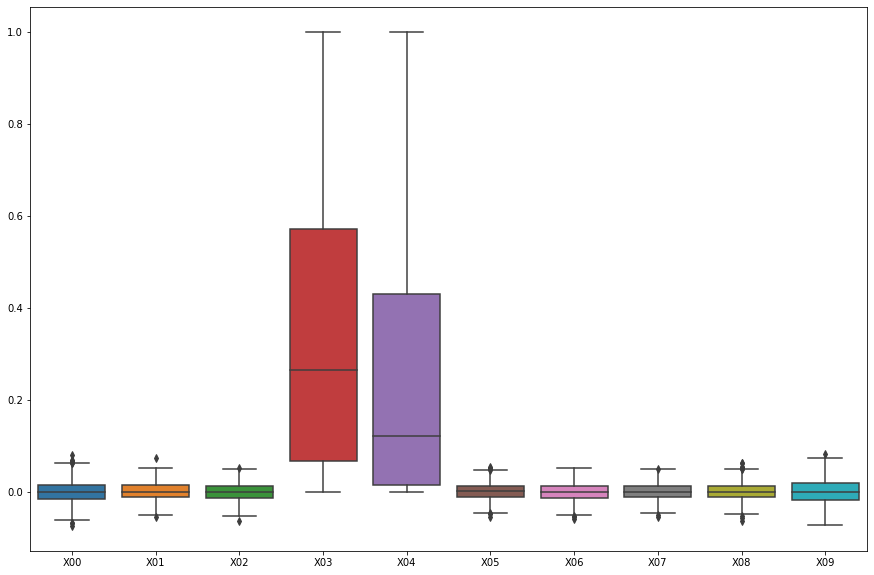

In [44]:
# plotting without the target
plt.figure(figsize=(15,10))
sns.boxplot(data = d.iloc[:,:-1]);

The correlation matrix

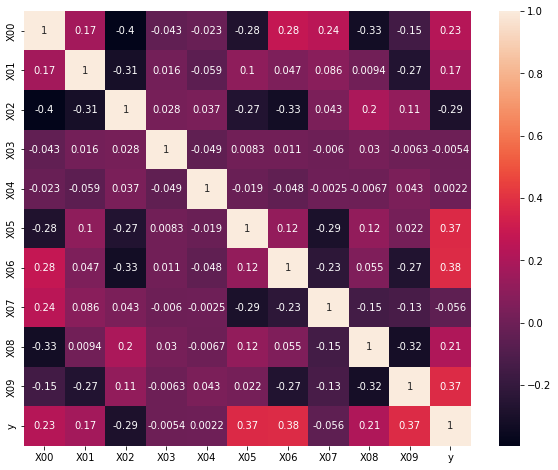

In [45]:
corr_matrix = d.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)
plt.show()

From the above exploration it can be seen that 
1. The box plot shows there are few outliers
2. The columns 'X02', 'X03','X04' and 'X07' has the absolute value of correlation with the target less than 0.15

In [46]:
X = d.drop('y', axis=1)
Y = d['y']
print(X.shape, Y.shape)

(1000, 10) (1000,)


Splitting into training and testing data

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=random_state, train_size=0.7)
print('Training set and test set have {} and {} elements respectively'.format(X_train.shape[0],X_test.shape[0]))

Training set and test set have 700 and 300 elements respectively


Training and Testing a Multivariate Linear Regressor and printing the Root Mean
Squared Error

In [76]:
# Creating linear regression object
linear_multi = linear_model.LinearRegression()

# Training the model using the training set
linear_multi.fit(X_train, y_train)

# Makeing predictions using the test set
y_test_pred = linear_multi.predict(X_test)

# The mean squared error
rmse = mean_squared_error(y_test, y_test_pred, squared=False)
print('The Root Mean Square Value : {} '.format(rmse))

The Root Mean Square Value : 0.8966103174598462 


Reducing the dataset by dropping the columns loosely correlated with the target, i.e the columns 'X02','X03' and 'X07' has the absolute value of correlation with the target less than 0.15

In [77]:
X_train_reduced=X_train.drop(['X02','X03','X04','X07'],axis=1)
X_test_reduced=X_test.drop(['X02','X03','X04','X07'],axis=1)
print(X_train_reduced.shape, X_test_reduced.shape)

(700, 6) (300, 6)


Training and  Testing a Multivariate Linear Regressor on the reduced dataset

In [78]:
# Createing linear regression object
linear_multi = linear_model.LinearRegression()

# Training the model using the training set
linear_multi.fit(X_train_reduced, y_train)

# Makeing predictions using the test set
y_test_pred_reduced = linear_multi.predict(X_test_reduced)

# The mean squared error
rmse_reduced = mean_squared_error(y_test, y_test_pred_reduced, squared=False)
print('The Root Mean Square Value : {} '.format(rmse_reduced))

The Root Mean Square Value : 1.0361973257778305 


Training and Testing on the reduced dataset a Decision Tree Regressor, and printing the Root Mean Squared Error

Fitting the tree with default hyperparameters, and finding the maximum depth of the unconstrained tree

In [79]:
dt = DecisionTreeRegressor(random_state=random_state)
# Training the model using the training set
dt.fit(X_train_reduced, y_train);
max_max_depth = dt.tree_.max_depth
print("The maximum depth of the full Decision Tree Regressor is {}".format(max_max_depth))

The maximum depth of the full Decision Tree Regressor is 19


In [80]:
# The Root Mean Square Error
y_test_pred_dt = dt.predict(X_test_reduced)

rmse_dt = mean_squared_error(y_test, y_test_pred_dt, squared=False)
print('Decision Tree Regressor - RMSE : {} '.format(rmse_dt))

Decision Tree Regressor - RMSE : 2.184275481737452 


Optimising the depth of the Decision Tree Regressor using cross-validation, and printing the best RMSE.

In [83]:
param_grid = {'max_depth': list(range(1,max_max_depth))}

# creating the grid search cross validation object
dt_gscv = GridSearchCV(estimator=DecisionTreeRegressor(random_state=random_state)
                    , param_grid=param_grid
                    , scoring='neg_root_mean_squared_error' # selecting model with minimum rmse
                    )
dt_gscv.fit(X_train_reduced,y_train);

# the GridSearchCV returns the best estimator
dt_best = dt_gscv.best_estimator_ 
best_max_depth = dt_best.tree_.max_depth

print("The optimal maximum depth for the decision tree is {}".format(best_max_depth))

The optimal maximum depth for the decision tree is 16


In [86]:
# The Root Mean Square Error
y_test_pred_dt_best = dt_best.predict(X_test_reduced)

rmse_dt_best = mean_squared_error(y_test, y_test_pred_dt_best, squared=False)

print("Decision Tree Regression - RMSE : {}".format(rmse_dt_best))

Decision Tree Regression - RMSE : 2.1733489481476584


In [85]:
print(" Final Report")
print(" Multivariate Regression using Complete Dataset \t : \t{}".format(rmse))
print(" Multivariate Regression using Reduced Dataset \t : \t{}".format(rmse_reduced))
print(" Decision Tree Regression without Optimization \t : \t{}".format(rmse_dt))
print(" Decision Tree Regression with Optimization \t : \t{}".format(rmse_dt_best))

 Final Report
 Multivariate Regression using Complete Dataset 	 : 	0.8966103174598462
 Multivariate Regression using Reduced Dataset 	 : 	1.0361973257778305
 Decision Tree Regression without Optimization 	 : 	2.184275481737452
 Decision Tree Regression with Optimization 	 : 	2.1733489481476584


From the above report it can be seen that the Multivariate Regression using the complete dataset gave a lower RMSE while on dropping columns with correlation less than 0.15 increased the RMSE.

For the Decision Tree Regressor the Optimized model with the best tree depth of 16 gave a little better RMSE than the not optimized model.

To compare the multivariate linear regressor and the Decision Tree Regressor, the Multivariate Linear Regressor has done a better prediction as Lower the RMSE value better is the prediction.